In [1]:
import numpy as np
import matplotlib.pyplot as plt

###### Plot Zeugs

In [2]:
def new_plot(settings):
    if settings != None and settings != {}:
        

        if "figsize" in settings:
            figsize_multiplier = settings["figsize"]
        else:
            figsize_multiplier = 1

        if "axis" in settings and "subplots" in settings:
            fig, axs = plt.subplots( settings["subplots"]["rows"], settings["subplots"]["cols"], figsize=( (settings["axis"]["x"][1] - settings["axis"]["x"][0]) * figsize_multiplier, ( settings["axis"]["y"][1] - settings["axis"]["y"][0]) * figsize_multiplier ))
        elif "axis" in settings and not("subplots" in settings):
            fig, axs = plt.subplots( figsize=( (settings["axis"]["x"][1] - settings["axis"]["x"][0]) * figsize_multiplier, ( settings["axis"]["y"][1] - settings["axis"]["y"][0]) * figsize_multiplier ))
        elif not("axis" in settings) and "subplots" in settings and not("figsize" in settings):
            fig, axs = plt.subplots( settings["subplots"]["rows"], settings["subplots"]["cols"])
        elif not("axis" in settings) and "subplots" in settings and "figsize" in settings:
            fig, axs = plt.subplots( settings["subplots"]["rows"], settings["subplots"]["cols"], figsize=(figsize_multiplier,figsize_multiplier))    
        elif not("axis" in settings) and not("subplots" in settings) and "figsize" in settings:
            fig, axs = plt.subplots(figsize=(figsize_multiplier,figsize_multiplier))
        else:
            fig, axs = plt.subplots()
 
        if(np.size(axs) == 1):
            axs = [axs]

        for ax in axs:
        #Achsen Skala
            if "lock_axis" in settings and settings["lock_axis"] and "axis" in settings:
                ax.axis([settings["axis"]["x"][0],settings["axis"]["x"][1],settings["axis"]["y"][0],settings["axis"]["y"][1]])

            #Achsen Beschriftunge
            if "axis_label_steps" in settings and "axis" in settings:
                ax.set_xticks( np.arange(settings["axis"]["x"][0], settings["axis"]["x"][1] +1, settings["axis_label_steps"]["x"]))
                ax.set_yticks( np.arange(settings["axis"]["y"][0], settings["axis"]["y"][1] +1, settings["axis_label_steps"]["y"]))
            

            #Gitter
            if "grid" in settings:
                if "axis" in settings and "minor_steps" in settings["grid"]:
                    ax.set_xticks(np.arange(settings["axis"]["x"][0], settings["axis"]["x"][1] +1, settings["grid"]["minor_steps"]["x"]),minor=True)
                    ax.set_yticks(np.arange(settings["axis"]["y"][0], settings["axis"]["y"][1] +1, settings["grid"]["minor_steps"]["y"]),minor=True)

                elif "axis" in settings and not("minor_steps" in settings["grid"]):
                    ax.set_xticks(np.arange(settings["axis"]["x"][0], settings["axis"]["x"][1] +1),minor=True)
                    ax.set_yticks(np.arange(settings["axis"]["y"][0], settings["axis"]["y"][1] +1),minor=True)
                    
                else:
                    ax.minorticks_on()

                ax.grid(which='minor', alpha=settings["grid"]["minor_alpha"])
                ax.grid(which='major', alpha=settings["grid"]["major_alpha"])

            #Achsen Verhältings
            if "aspect" in settings:
                ax.set_aspect(settings["aspect"])

        if(np.size(axs) == 1):
            axs = axs[0]

    else:
        fig, axs = plt.subplots()
    
    return fig, axs

In [3]:
def draw_plot(x,y,color,settings=None,subplot=(None,None)):

    if subplot == (None,None):
        fig, ax = new_plot(settings)
    else:
        fig, ax = subplot
 
    if np.size(ax) > 1:
        for i in range(0, np.size(ax)):
            ax[i].plot(x[i], y[i], color[i])
    else:
        ax.plot(x, y, color)
    
    return fig, ax

# Aufgabe 

##### plot_settings

In [4]:
plot_settings={
    "axis":{
        "x": (-4,4),
        "y": (-5,7)
    },
    "aspect": 'equal',
    "axis_label_steps":{
        "x": 1,
        "y": 1,
    },
    "lock_axis": True,
    "grid":{
        "minor_alpha": 0.2,
        "major_alpha": 0.8,
        "minor_steps":{
            "x": 0.5,
            "y": 0.5
        }
    }
}

#### Lösung

In [5]:
def rotate(x, y, degree, offset=(0,0) ):
    x_offset, y_offset = offset
    
    rad = degree*(np.pi/180)# np.cos und np.sin benötigen Rad statt Grad
    
    ##Im Uhrzeigersinn um offset rotiren mit Verschibung zum offset und wider zurück
    x_out = x_offset + np.cos(rad) * (x - x_offset) +  np.sin(rad) * (y - y_offset)
    y_out = y_offset - np.sin(rad) * (x - x_offset) +  np.cos(rad) * (y - y_offset)

    return x_out, y_out

In [7]:
x = np.array([-3, 0, 3, np.nan, -2, 2])
y = np.array([-3, 6, -3, np.nan, 0, 0])

x_r, y_r = rotate(x, y, -20)

##### Plot

(<Figure size 576x864 with 1 Axes>, <AxesSubplot:>)

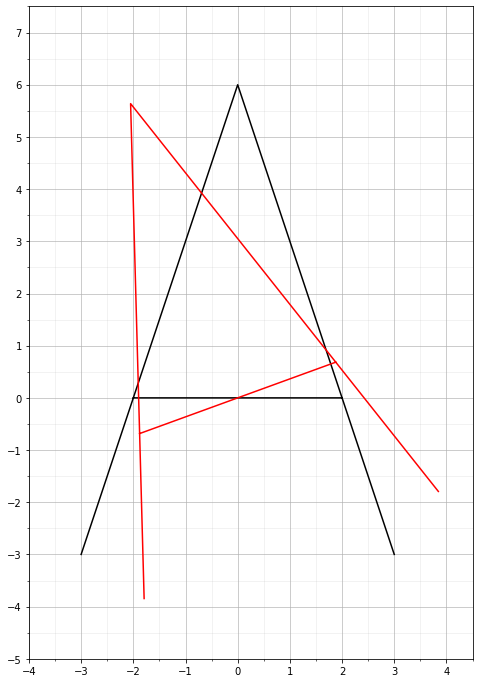

In [8]:
subplot= draw_plot(x, y, 'k', plot_settings)
draw_plot(x_r, y_r, 'r', subplot=subplot)

##### Plot